### Take all vars and do boost

##### here we do preprocessing with filling in Nan values with medians or averages

In [1]:
import pandas as pd
pd.options.display.max_rows=100
pd.options.display.max_columns=500
import numpy as np
import os, pickle
import matplotlib.pyplot as plt
import seaborn as sns

# import scipy.stats as stats

from sklearn import ensemble, model_selection, metrics, datasets, tree, linear_model
import xgboost as xgb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

## Work with Russia ( 643 )

In [2]:
with open("only_rus.pck", "br") as f:
    df_r=pickle.load(f)

In [3]:
df1=df_r.drop(['version','doi','A_WAVE','A_STUDY','B_COUNTRY','B_COUNTRY_ALPHA',
          'C_COW_NUM','C_COW_ALPHA','A_YEAR','D_INTERVIEW','J_INTDATE','FW_END',
          'FW_START','K_TIME_START','K_TIME_END','K_DURATION','Q_MODE','N_REGION_ISO',
          'N_REGION_WVS','N_TOWN','G_TOWNSIZE','H_SETTLEMENT','I_PSU','O1_LONGITUDE',
        'O2_LATITUDE','S_INTLANGUAGE','LNGE_ISO','E_RESPINT','F_INTPRIVACY','W_WEIGHT',
        'S018','Q33_3','Q34_3','Q35_3','Q82','Q82_EU','Q82_APEC','Q82_ARABLEAGUE','Q82_ASEAN',
        'Q82_AFRICANUNION','Q82_CIS','Q82_ECO','Q82_GULFCOOP','Q82_ISLCOOP','Q82_MERCOSUR',
        'Q82_NAFTA','Q82_OAS','Q82_SAARC','Q82_SCO','Q82_TLC','Q82_UNDP','Q91','Q92','Q93',
        'Q223','Q223_ABREV','Q223_LOCAL','Partyname','Partyabb','CPARTY','CPARTYABB',
        'v2psprlnks','v2xnp_client','v2xps_party','v2psbars','v2psorgs','v2psprbrch',
        'v2psplats','WVS_LibCon_PartyVoter','WVS_Polmistrust_PartyVoter','WVS_LR_MedianVoter',
        'GPS_V6_Scale','GPS_V8_Scale','GPS_V9','GPS_V10',
        'GPS_V11','GPS_V12','GPS_V13','GPS_V14',
        'GPS_V15','GPS_V16','GPS_V17','WVS_LR_PartyVoter','WVS_LibCon_MedianVoter',
        'ID_GPS','ID_PartyFacts','Type_Values','Type_Populism','Type_Populist_Values',
        'Type_Partysize_vote','Type_Partysize_seat','GPS_V4_Scale','I_AUTHORITY',
                #точно убираем - одно-два значения 
        'lifeexpectHDI','homiciderate','Refugeesorigin','internetusers','mobphone','fhregion',
        'polregfh','freestfh','prfhrat','prfhscore','clfhrat','clfhscore','democ',
        'autoc','polity','durable','regtype','ruleoflaw','corrupttransp','electintegr',
        'btiregion','btistatus','btidemstatus','btistate','btipolpart','btiruleoflaw','btistability',
        'btiintegration','btimarket','btigovindex',
        'btigoveperform','btiregime','regionWB','incomeWB','landWB','GDPpercap1','GDPpercap2',
        'giniWB','incrichest10p','popWB1990','popWB2000','popWB2019','lifeexpect','popgrowth',
        'urbanpop','laborforce','deathrate','unemployfem','unemploymale','unemploytotal','accessclfuel',
        'accesselectr','renewelectr','co2emis','co2percap','easeofbusiness','militaryexp','Trade',
        'healthexp','educationexp','medageun','meanschooling','educationHDI','compulseduc','GII',
        'DGI','womenparl','hdi','incomeindexHDI','humanineqiality','migrationrate','schoolgpi',
        'femchoutsch','choutsch','v2x_polyarchy','v2x_libdem','v2x_partipdem','v2x_delibdem',
        'v2x_egaldem','v2x_freexp_altinf','v2x_frassoc_thick','v2xel_frefair','v2xcl_rol',
        'v2x_cspart','v2xeg_eqdr','v2excrptps','v2exthftps','v2juaccnt','v2cltrnslw','v2clacjust',
        'v2clsocgrp','v2clacfree','v2clrelig','v2csrlgrep','v2mecenefm','v2mecenefi','v2mebias',
        'v2pepwrses','v2pepwrgen','v2peedueq','v2pehealth','v2peapsecon','v2peasjsoecon',
        'v2clgencl','v2peasjgen','v2peasbgen','v2cafres','v2cafexch','v2x_corr','v2x_gender',
        'v2x_gencl','v2x_genpp','v2x_rule','v2xcl_acjst','PWGHT','E1_LITERACY','S025',
        'I_NATIONALISM','I_DEVOUT','I_TRUSTARMY','I_TRUSTPOLICE','I_TRUSTCOURTS',
        'I_RELIGIMP','I_RELIGBEL','I_RELIGPRAC','I_NORM1','I_NORM2','I_NORM3','RELATIVISM',
        'SACSECVAL','RESEMAVAL','DEFIANCE','DISBELIEF','SCEPTICISM',
        'I_INDEP','I_IMAGIN','I_NONOBED','AUTONOMY','I_WOMJOB','I_WOMPOL','I_WOMEDU','EQUALITY','I_HOMOLIB','I_ABORTLIB','Y001','Y002','Y003',
        'I_DIVORLIB','CHOICE','I_VOICE1','I_VOICE2','I_VOI2_00','VOICE','SECVALWGT','RESEMAVALWGT',
        'Q68', #профсоюз labour union
        'Q275R','Q275A',  #highest educ other scales  [possible to leave R]
        'Q276R','Q276A',  #highest educ other scales for spouze
        'Q277R','Q277A',  #highest educ other scales for mother
        'Q278R','Q278A',  #highest educ other scales for father
        'Q288R', #scale of incomes
        'Q73', #доверие парламенту
        'Q76','Q77',
#         'Q167', #believe in hell
               
        'Q79','Q80','Q81','Q83','Q84','Q85','Q86','Q87','Q88','Q89','Q90','Q289CS9',
        'Q112','Q113','Q114','Q115','Q116', #взятки
        'Q117', #журналисты взятки
        'Q118', #дают взятки
#         'Q136', #drugs in neighb
        'Q209', #petition
        'Q221','Q222','Q224','Q226','Q228','Q232','Q233','Q234','Q235',
        'Q225', #opposition is prevented from running
        'Q227', #voters are brided
        'Q229','Q230','Q231','Q234A','Q236',
        'Q237','Q238','Q239','Q240', #political
        'X003R2','x003r',
        'Q261', #год рождения
        'H_URBRURAL', #correlates with G_TOWNSIZE2
        'Q3', #corr qith Q2
        'Q19', #corr with 26:Neighbors: People who speak a different language
               #CORRELATIONS:
        'Q181', #Justifiable: Someone accepting a bribe in the course of their duties
        'Q191', #Justifiable: Violence against other people
        'Q206', #Information source: Internet
        'Q171', #How often do you attend religious services
        'Q75', #Confidence: Universities
        'Q179', #Justifiable: Stealing property
        'Q217', #Political actions online: Searching information about politics and political events
        'Q65', #Confidence: Armed Forces
        'Q183', #Justifiable: Prostitution
        'Q168', #Believe in: heaven
        'Q72', #Confidence: The Political Parties
        'Q215',  #Social activism: Encouraging others to take action about political issues
        'Q248', #Democracy: People obey their rulers
        'Q208', #Information source: Talk with friends or colleagues
        'Q29', #Men make better political leaders than women do
        'Q123', #Immigration in your country: Strengthens cultural diversity
        'Q271', #Do you live with your parents
        'Q106', #Income equality vs larger income differences
        'Q244', #Democracy: People receive state aid for unemployment
        'Q216', # Social activism: Encouraging others to vote
        'Q173', # Religious person
        'Q134', #Frequency in your neighborhood: Police or military interfere with people’s private life
        'Q55', #In the last 12 month, how often have you or your family: Gone without a safe shelter over your head
        'Q54', #Frequency you/family (last 12 month): Gone without a cash income
        'Q96', #Active/Inactive membership: art, music, educational organization
        'Q190', #Justifiable: Parents beating children
        'Q192', #Justifiable: Terrorism as a political, ideological or religious mean
        'Q59', #Trust: Your neighborhood

#         'Q151', #Willingness to fight for country
#         'Q152', 'Q153',#Aims of country: first,second choice
#         'Q161', #a lot of middle (5)
#         'Q148', #To what degree are you worried about the following situations? A civil war
#         'Q149', #Freedom and Equality - Which more important
#         'Q147', #Worries: A terrorist attack

#         'Q64', #corr many; conf in churches
#         'Q284', #Sector of employment - no tendency
#         'Q285', #possibly NOT reliable - Are you the chief wage earner in your house
#         'Q289', #orthodox(~490), muslim,,,
#         'Q290' #Челябинск, краснодарская, дагест...
              ],axis=1)

In [4]:
# plt.hist(df1['Q274'], bins=50);
# plt.title('Distribution of childs in dataset')
# plt.show()


In [5]:
df2 = df1[(df1['Q260'] == 2) & (df1['Q262'] > 39)].drop(['Q260','Q262'],axis=1)
df2.reset_index(inplace=True, drop=True)

#Transform kids number more than 3 is three (clipped)
df2['Q274ed'] = np.where(df2['Q274']>3, 3, df2['Q274'])
df2.drop(['Q274'],axis=1, inplace = True)

#all negatives are nans
df2[df2<0] = np.nan

#fill in nans
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df2)
df3 = imputer.transform(df2)
df3 = pd.DataFrame(data = df3, columns= df2.columns.values)

In [4]:
# df2['Q274'].isna().sum()

## Transform columns that have only two responses

In [6]:
col_two_responses = []
for col in df3.columns:
    if len(df3[col].value_counts()) == 2:
        col_two_responses.append(col)
#         print(col)
#         df3[col] = np.where(df3[col] == 2, 0, df3[col])
col_two_responses.pop()
print(col_two_responses)
df3_one_hot = pd.get_dummies(df3, prefix=col_two_responses, columns=col_two_responses)

['Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q57', 'Q139', 'Q140', 'Q141', 'Q144', 'Q145', 'Q149', 'Q150', 'Q151', 'Q165', 'Q166', 'Q167', 'Q174', 'Q175', 'Q263', 'Q264', 'Q265', 'Q269']


In [15]:
df3_one_hot.columns.values

array(['G_TOWNSIZE2', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q27', 'Q28', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39',
       'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q56', 'Q58', 'Q60', 'Q61',
       'Q62', 'Q63', 'Q64', 'Q66', 'Q67', 'Q69', 'Q70', 'Q71', 'Q74',
       'Q78', 'Q94', 'Q95', 'Q97', 'Q98', 'Q99', 'Q100', 'Q101', 'Q102',
       'Q103', 'Q104', 'Q105', 'Q107', 'Q108', 'Q109', 'Q110', 'Q111',
       'Q119', 'Q120', 'Q121', 'Q122', 'Q124', 'Q125', 'Q126', 'Q127',
       'Q128', 'Q129', 'Q130', 'Q131', 'Q132', 'Q133', 'Q135', 'Q136',
       'Q137', 'Q138', 'Q142', 'Q143', 'Q146', 'Q147', 'Q148', 'Q152',
       'Q153', 'Q154', 'Q155', 'Q156', 'Q157', 'Q158', 'Q159', 'Q160',
       'Q161', 'Q162', 'Q163', 'Q164', 'Q169', 'Q170', 'Q172', 'Q176',
       'Q177', 'Q178', 'Q180', 'Q182', 'Q184', 'Q185', 'Q186', 'Q187',
       'Q188', 'Q189', 'Q193', 'Q194', 'Q195', 'Q196', 'Q197', 'Q198',
      

## Value counts and crosstab

In [13]:
# df3['Q184'].value_counts()

In [17]:
tmp1 = pd.crosstab(df3['Q195'], df3['Q274ed'], normalize=True) * 100
tmp1

Q274ed,0.0,1.0,2.0,3.0
Q195,,,,
1.0,4.041916,14.371257,15.119760,6.437126
2.0,0.449102,2.095808,2.544910,0.748503
3.0,0.598802,2.544910,2.544910,0.748503
4.0,0.449102,2.844311,1.946108,1.047904
5.0,0.299401,5.389222,5.089820,2.095808
6.0,1.347305,3.592814,3.742515,0.449102
7.0,0.299401,2.994012,1.347305,0.598802
8.0,0.149701,2.694611,1.646707,1.047904
9.0,0.299401,0.898204,1.347305,0.149701


In [18]:
tmp1.sum(axis=0)

Q274ed
0.0     8.682635
1.0    39.670659
2.0    37.574850
3.0    14.071856
dtype: float64

In [19]:
from scipy.stats import pearsonr

In [21]:
pearsonr(df3['Q274ed'], df3['Q195'])

(-0.04058427132527067, 0.2949170780831799)

In [ ]:
tmp2 = pd.DataFrame(tmp1.values, columns = ['0', '1'])

In [ ]:
tmp2['%'] = tmp2['1']/tmp2['0']

In [ ]:
tmp2

In [ ]:
# df3=df3[['Q210','Q279','Q273','Q113','Q89','Q270','Q94','Q248','Q278','Q172','Q261','Q183','Q56','Q274']]

**correlation matrix**


In [22]:
corr_m = df3.corr()
corr2 = corr_m[(corr_m > -0.3) & (corr_m < 0.3)]

In [23]:
all_nan_corrs = []
for col in corr2.columns:
    all_nan_corrs.append(corr2[col].isna().sum())
corr_nans_sorted = np.argsort(all_nan_corrs)
for i in corr_nans_sorted[::-1]:
    print(corr2.columns.values[i], all_nan_corrs[i])

Q275 10
Q74 9
Q277 8
Q278 8
Q102 8
Q67 8
Q164 7
Q71 7
Q64 7
Q70 7
Q193 7
Q281 6
Q172 6
Q287 6
Q184 6
Q137 6
Q279 6
Q69 6
Q50 5
Q47 5
Q182 5
Q186 5
Q6 5
Q187 5
Q66 5
Q167 5
Q165 5
Q185 5
Q188 5
Q132 5
Q135 5
Q288 5
Q101 5
Q40 5
Q283 5
Q282 5
Q273 5
Q138 5
Q78 5
Q53 4
Q104 4
Q189 4
Q136 4
Q177 4
Q180 4
Q61 4
Q62 4
Q63 4
Q142 4
Q99 4
Q105 4
Q129 4
Q166 4
Q60 4
Q128 4
Q210 4
Q247 4
Q267 4
Q249 4
Q268 4
Q49 4
Q46 4
Q219 4
Q266 4
Q253 4
Q211 4
Q246 4
Q265 4
Q124 4
Q264 4
Q263 4
Q126 4
Q41 4
Q285 4
Q289 4
Q95 3
Q158 3
Q51 3
Q148 3
Q21 3
Q147 3
Q146 3
Q100 3
Q270 3
Q20 3
Q103 3
Q276 3
Q39 3
Q159 3
Q256 3
Q37 3
Q257 3
Q204 3
Q205 3
Q199 3
Q198 3
Q197 3
Q196 3
Q23 3
Q194 3
Q207 3
Q212 3
Q214 3
Q218 3
Q220 3
Q178 3
Q30 3
Q243 3
Q251 3
Q252 3
Q5 3
Q255 3
Q52 3
Q163 3
Q133 3
Q25 2
Q144 2
Q98 2
Q97 2
Q31 2
Q33 2
Q48 2
Q45 2
Q44 2
Q36 2
Q24 2
Q161 2
Q121 2
Q155 2
Q157 2
Q160 2
Q22 2
Q170 2
Q195 2
Q200 2
Q213 2
Q241 2
Q242 2
Q245 2
Q258 2
Q259 2
Q4 2
Q272 2
Q280 2
Q156 2
Q169 2
Q154 2
Q145 2
Q125 2
Q1

In [ ]:
corr2.head(50)


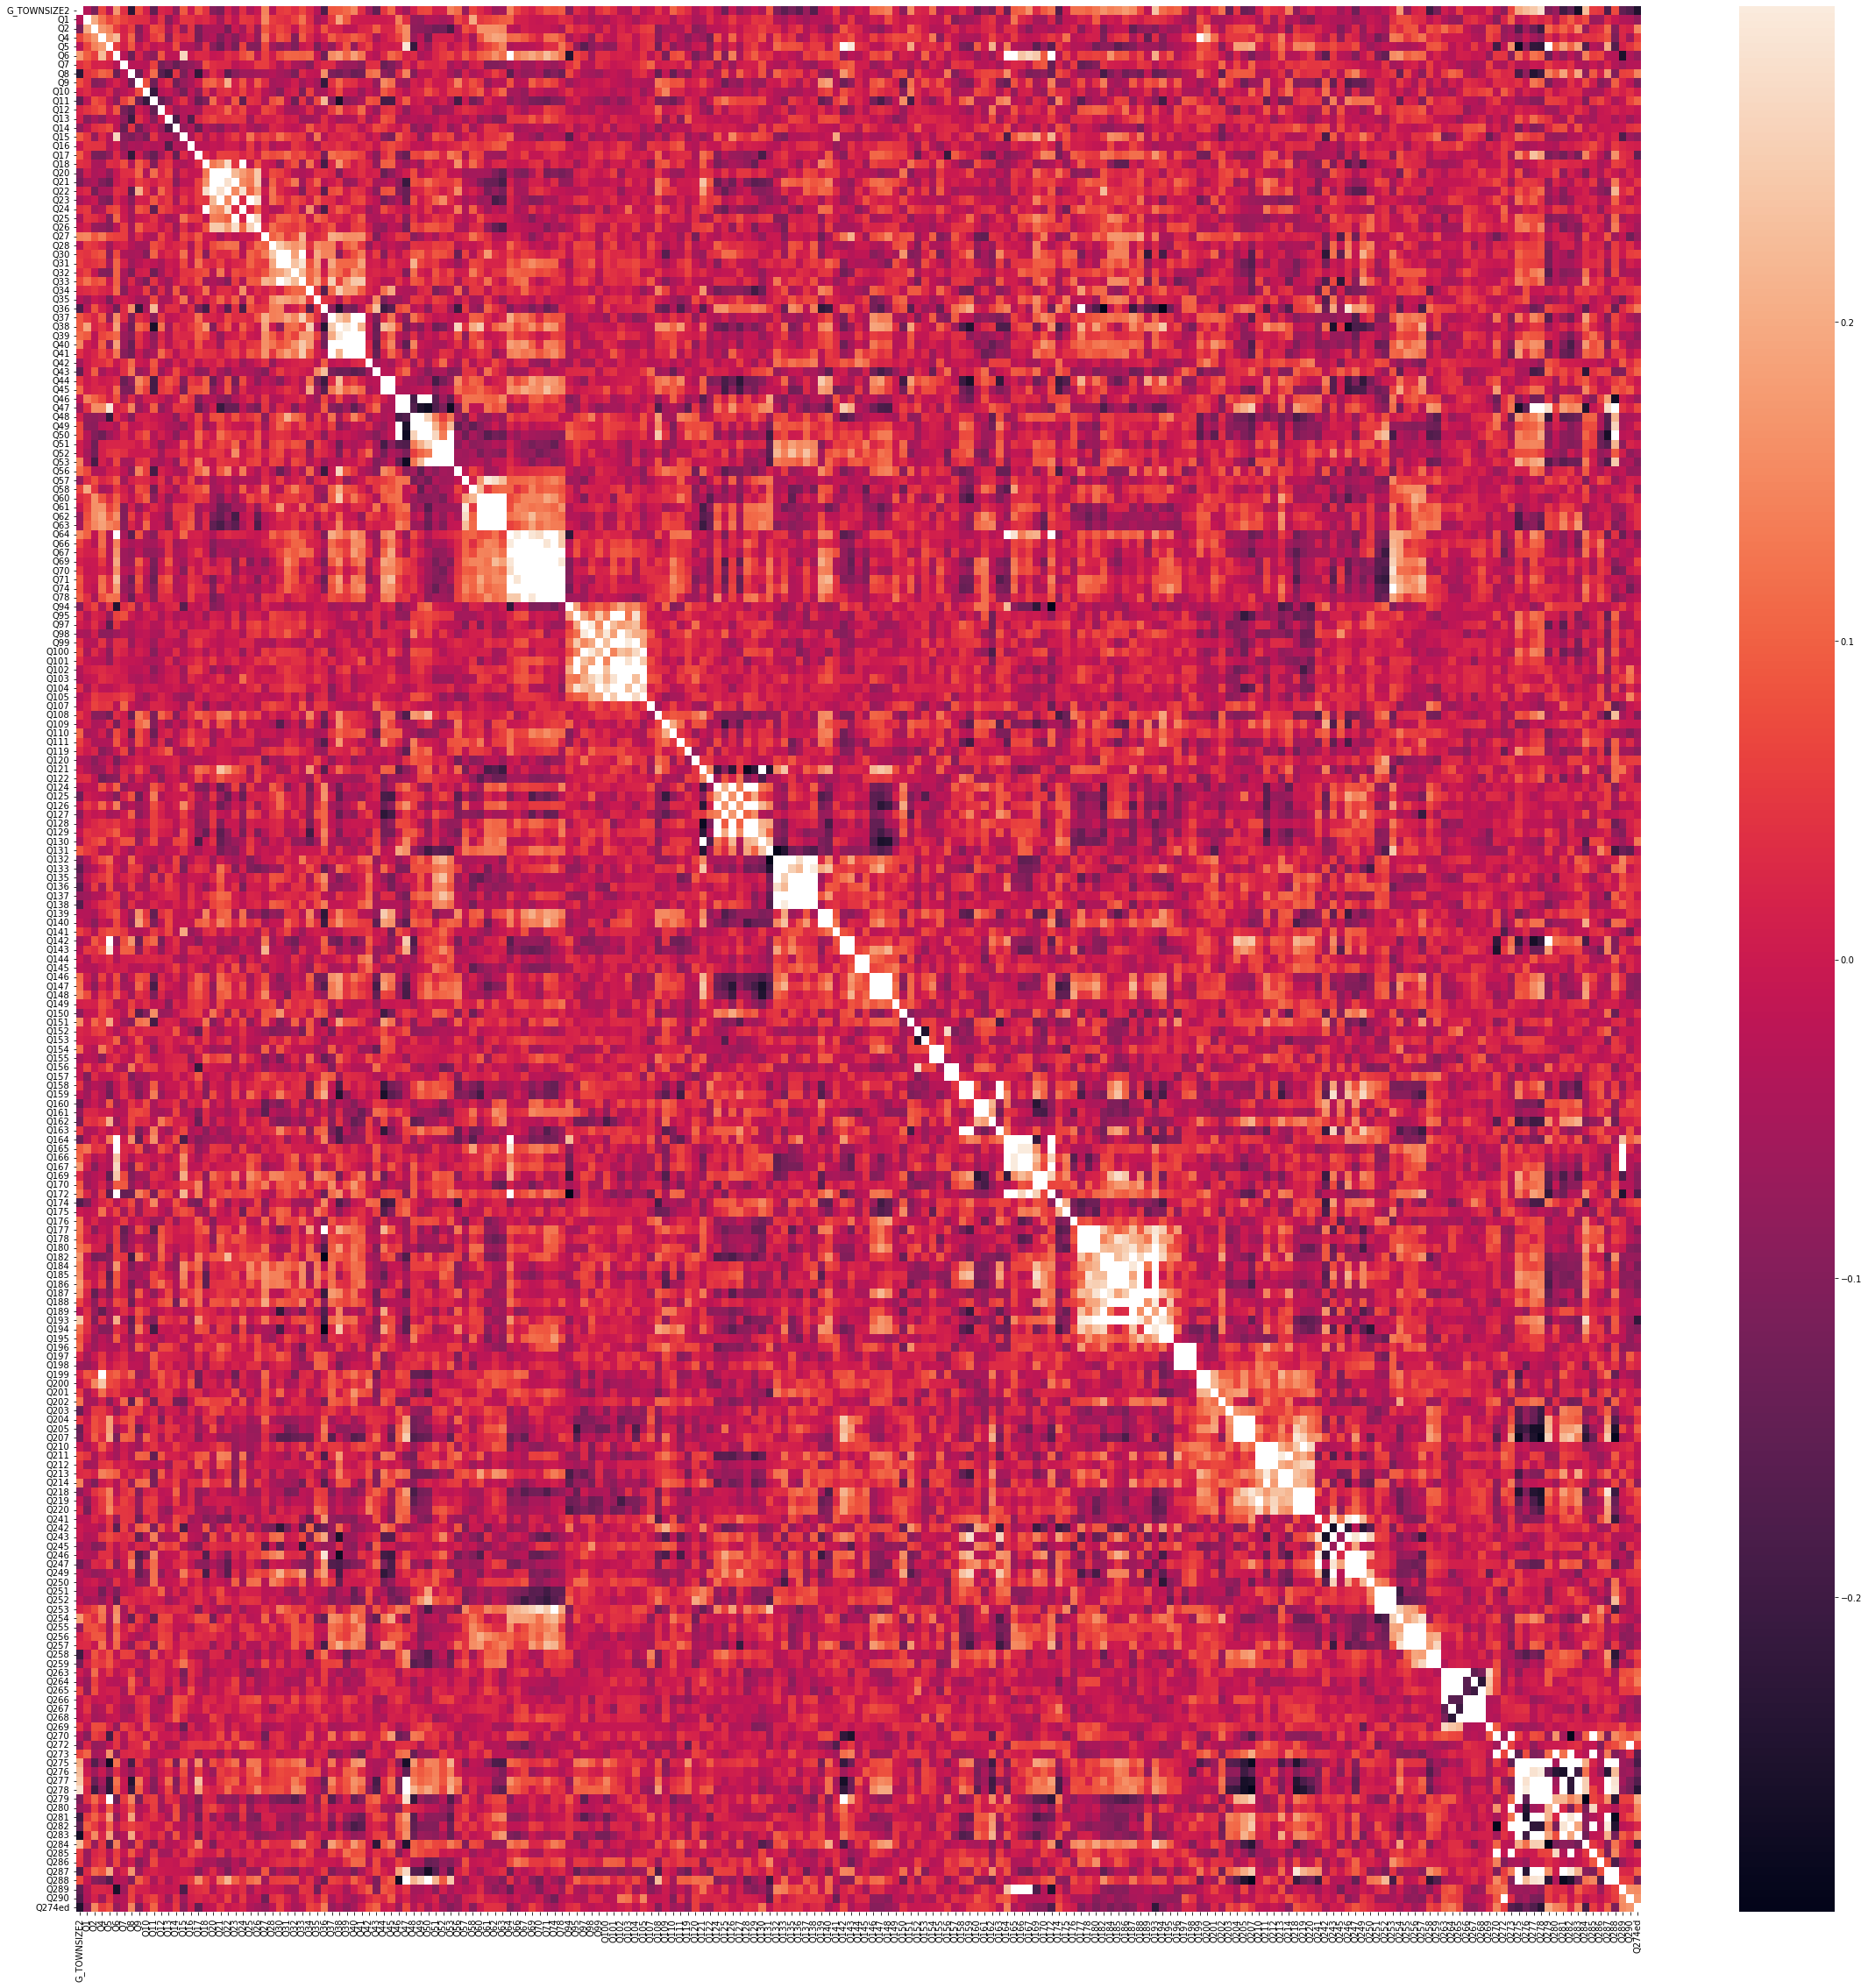

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(corr2, 
        xticklabels=corr_m.columns,
        yticklabels=corr_m.columns,cmap=sns.color_palette("rocket", as_cmap=True));

In [27]:
print(df3[col].min())
print(df3[col].max())
print(np.round(df3[col],1).value_counts)

0.0
3.0
<bound method IndexOpsMixin.value_counts of 0      2.0
1      1.0
2      2.0
3      0.0
4      1.0
      ... 
663    3.0
664    2.0
665    1.0
666    1.0
667    2.0
Name: Q274ed, Length: 668, dtype: float64>


In [ ]:
# for col in df3.columns:
#     print(col, df3[col].isna().sum())

In [ ]:
X.isna().sum().sum()

In [ ]:
# !nvidia-smi

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

NameError: name 'X' is not defined

In [31]:
expl_var = pca.explained_variance_ratio_
print(expl_var[:250].sum())

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [32]:
plt.figure(figsize=(16,6))
plt.bar(range(70), pca.explained_variance_ratio_[:70], label="df")
plt.title("Explained variance ratio for original df")
# plt.bar(range(50), expl_var[:50], label="df")
# plt.ylim([0,0.1])
plt.legend()
plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 1152x432 with 0 Axes>

## Regression model

In [34]:
GPUn=3
for _ in range(7):
    df4 = df3.sample(frac = 1)
#     df4 = df3_one_hot.sample(frac = 1)
    X = df4.drop(columns=['Q274ed'])
    y = df4['Q274ed']
    
#     sc=StandardScaler()
#     sc.fit(X)
#     X_sc = sc.transform(X)
#     pca = PCA(n_components=150)  #
#     pca.fit(X_sc)
#     X_sc_pca = pca.transform(X_sc)

#     r_state = np.random.randint(200)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                    test_size = 0.20,
                    shuffle=False)
    eval_set = [(X_train, y_train), (X_test, y_test)] #errors log container
    bst = xgb.XGBRegressor(objective ='reg:squarederror', 
                       max_depth=5, 
                       n_estimators=1000, #1000 
                       eta = 0.05,
                       random_state = 40,
                       tree_method='gpu_hist', 
                       gpu_id=GPUn)
    bst.fit(X_train, y_train, eval_set=eval_set, eval_metric= "rmse", verbose=False)
    y_pred = bst.predict(X_test)
    r2_out = metrics.r2_score(y_test, y_pred)
    print(_, r2_out)


0 0.12651229931921704
1 0.10443282606632098
2 0.05182758222991113
3 0.16973715665587408
4 0.11024489786763625
5 -0.04418295294394481
6 0.13762846001498652


In [17]:
from sklearn.feature_selection import RFE

In [19]:
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                       max_depth=5, 
                       n_estimators=1000, #1000 
                       eta = 0.05,
                       random_state = 40,
                       tree_method='gpu_hist', 
                       gpu_id=GPUn)
#Initializing RFE model
rfe = RFE(model, 150)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train, y_train)  
#Fitting the data to model
model.fit(X_rfe, y_train)
print(rfe.support_)
print(rfe.ranking_)

/home/mansur/miniconda3/envs/trch/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=150 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [1]:
1+3

4

### Dendrogramm

In [ ]:

def dual_plot(x_train):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,30))
    corr = spearmanr(x_train).correlation
    corr_linkage = hierarchy.ward(corr)

    dendro = hierarchy.dendrogram(corr_linkage, labels=list(x_train.columns), ax=ax1, leaf_rotation=90)
    dendro_idx = np.arange(0, len(dendro['ivl']))

    ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
    ax2.set_xticks(dendro_idx)
    ax2.set_yticks(dendro_idx)
    ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
    ax2.set_yticklabels(dendro['ivl'])
    fig.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
dual_plot(df3.drop(columns=['Q274ed']))

### MDA

In [ ]:
from sklearn.inspection import permutation_importance 
from mlfinlab.clustering.feature_clusters import get_feature_clusters
result = permutation_importance(bst, X_test, y_test, n_repeats=4, random_state=42, n_jobs=2) #важность скорингом

In [ ]:
mda_perm_sorted_idx = result.importances_mean.argsort() #усреднение и сортировка

In [ ]:
c = 0
d = dict()
for el, res in zip(X.columns.values, result.importances_mean):
    print(c, el, res)
    d[el] = res
    c+=1

In [ ]:
feature_clusters = get_feature_clusters(X, dependence_metric='linear', n_clusters=13, distance_metric='angular', linkage_method='ward')  #add one to n_clusters

In [ ]:
feature_clusters

In [ ]:
for group in feature_clusters:
    max_res = dict()
    for el in group:
        max_res[el] = d[el]
    print(max_res)
    print(max(max_res, key=max_res.get))
    print('---------------')

In [ ]:
feature_clusters

In [ ]:
mda_perm_sorted_idx

In [ ]:
tree_indices = np.arange(0, N_feat ) + 0.5

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

ax1.barh(tree_indices, feature_scores_mdi[mdi_perm_sorted_idx[-N_feat:]], height=0.7)
ax1.set_yticklabels(feature_names[mdi_perm_sorted_idx[-N_feat:]])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, N_feat))
ax1.set_title('MDI')

ax2.boxplot(result.importances[mda_perm_sorted_idx[-N_feat:]].T, vert=False,
            labels=np.array(feature_names)[mda_perm_sorted_idx[-N_feat:]])
ax2.set_title('MDA')
fig.tight_layout()
plt.show()

In [ ]:
feature_clusters

In [ ]:
r = permutation_importance(bst, X, y, n_repeats=4, n_jobs=10, random_state=42)
mda_idx = r.importances_mean.argsort()

In [ ]:
N_feat=X.shape[1]
feature_names=X.columns.values
plt.figure(figsize=(14,18))
plt.boxplot(r.importances[mda_idx[-N_feat:]].T, vert=False,
            labels=np.array(feature_names)[mda_idx[-N_feat:]])
plt.title('MDA: replace features with random values and see how r2 decreases')
plt.show()

In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

# summarize the effects of all the features
shap.summary_plot(shap_values, X)

## Clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
kmeans = KMeans(
   init="random",
   n_clusters=3,
   n_init=10,
   max_iter=300,
   random_state=42)

In [ ]:
kmeans.fit(df1)

In [ ]:
# The lowest SSE value
print(kmeans.inertia_)

# Final locations of the centroid
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print(kmeans.n_iter_)
    

In [ ]:
kmeans.labels_[:5]

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
    

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df1)
    score = silhouette_score(df1, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
df_r_test = df_r[(df_r.Q1.isin([1,2,3,4])) & (df_r.Q2.isin([1,2,3,4]))][['Q1','Q2']]

In [ ]:
len(df_r_test)

In [ ]:
n = np.sum(df_r_test)

In [ ]:
n

In [ ]:
import scipy.stats as stats
X2 = stats.chi2_contingency(df_r_test, correction=False)[0]

In [ ]:
X2

In [ ]:
df_r_test.groupby().count() 